In [1]:
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore', FutureWarning)
plt.style.use('seaborn')
plt.rcParams['figure.figsize']=(16,6)
plt.rcParams['figure.dpi'] = 300

In [14]:
import pandas as pd 
from pandas_datareader import data as wb
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = round(wb.DataReader('RBS.L',start='2011-1-1',data_source='yahoo'),2)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-04,412.5,403.0,405.0,406.8,10912708.0,354.91
2011-01-05,410.0,398.0,407.0,409.5,9658431.0,357.26
2011-01-06,416.5,402.0,405.4,404.9,11210095.0,353.25
2011-01-07,404.1,399.4,404.0,401.0,9055659.0,349.85
2011-01-10,404.7,393.8,400.8,395.0,6564457.0,344.61


In [4]:
df = df.loc[:,['Adj Close']]
df.rename(columns={'Adj Close':'price'},inplace=True)

In [5]:
df_f = df['price']
df_f.head()

Date
2011-01-04    354.91
2011-01-05    357.26
2011-01-06    353.25
2011-01-07    349.85
2011-01-10    344.61
Name: price, dtype: float64

In [6]:
df = pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2381 entries, 2011-01-04 to 2020-06-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2381 non-null   float64
dtypes: float64(1)
memory usage: 37.2 KB


In [7]:
df.head()

,price
Date,
2011-01-04,354.91
2011-01-05,357.26
2011-01-06,353.25
2011-01-07,349.85
2011-01-10,344.61


In [8]:
df = df.resample('M').last()

In [9]:
print(f'Shape of Dataframe: {df.shape}')
df.head()

Shape of Dataframe: (114, 1)


,price
Date,
2011-01-31,363.63
2011-02-28,393.99
2011-03-31,355.87
2011-04-30,361.80
2011-05-31,371.66


In [10]:
df['rolling_mean'] = df.price.rolling(window=12).mean()
df['rolling_std'] = df.price.rolling(window=12).std()
df.head(),df.tail()

(             price  rolling_mean  rolling_std
 Date                                         
 2011-01-31  363.63           NaN          NaN
 2011-02-28  393.99           NaN          NaN
 2011-03-31  355.87           NaN          NaN
 2011-04-30  361.80           NaN          NaN
 2011-05-31  371.66           NaN          NaN,
              price  rolling_mean  rolling_std
 Date                                         
 2020-02-29  172.12    203.730000    17.602337
 2020-03-31  112.90    194.506667    30.516006
 2020-04-30  110.55    185.645833    37.958681
 2020-05-31  110.35    178.721667    43.571113
 2020-06-30  118.25    171.995833    46.306539)

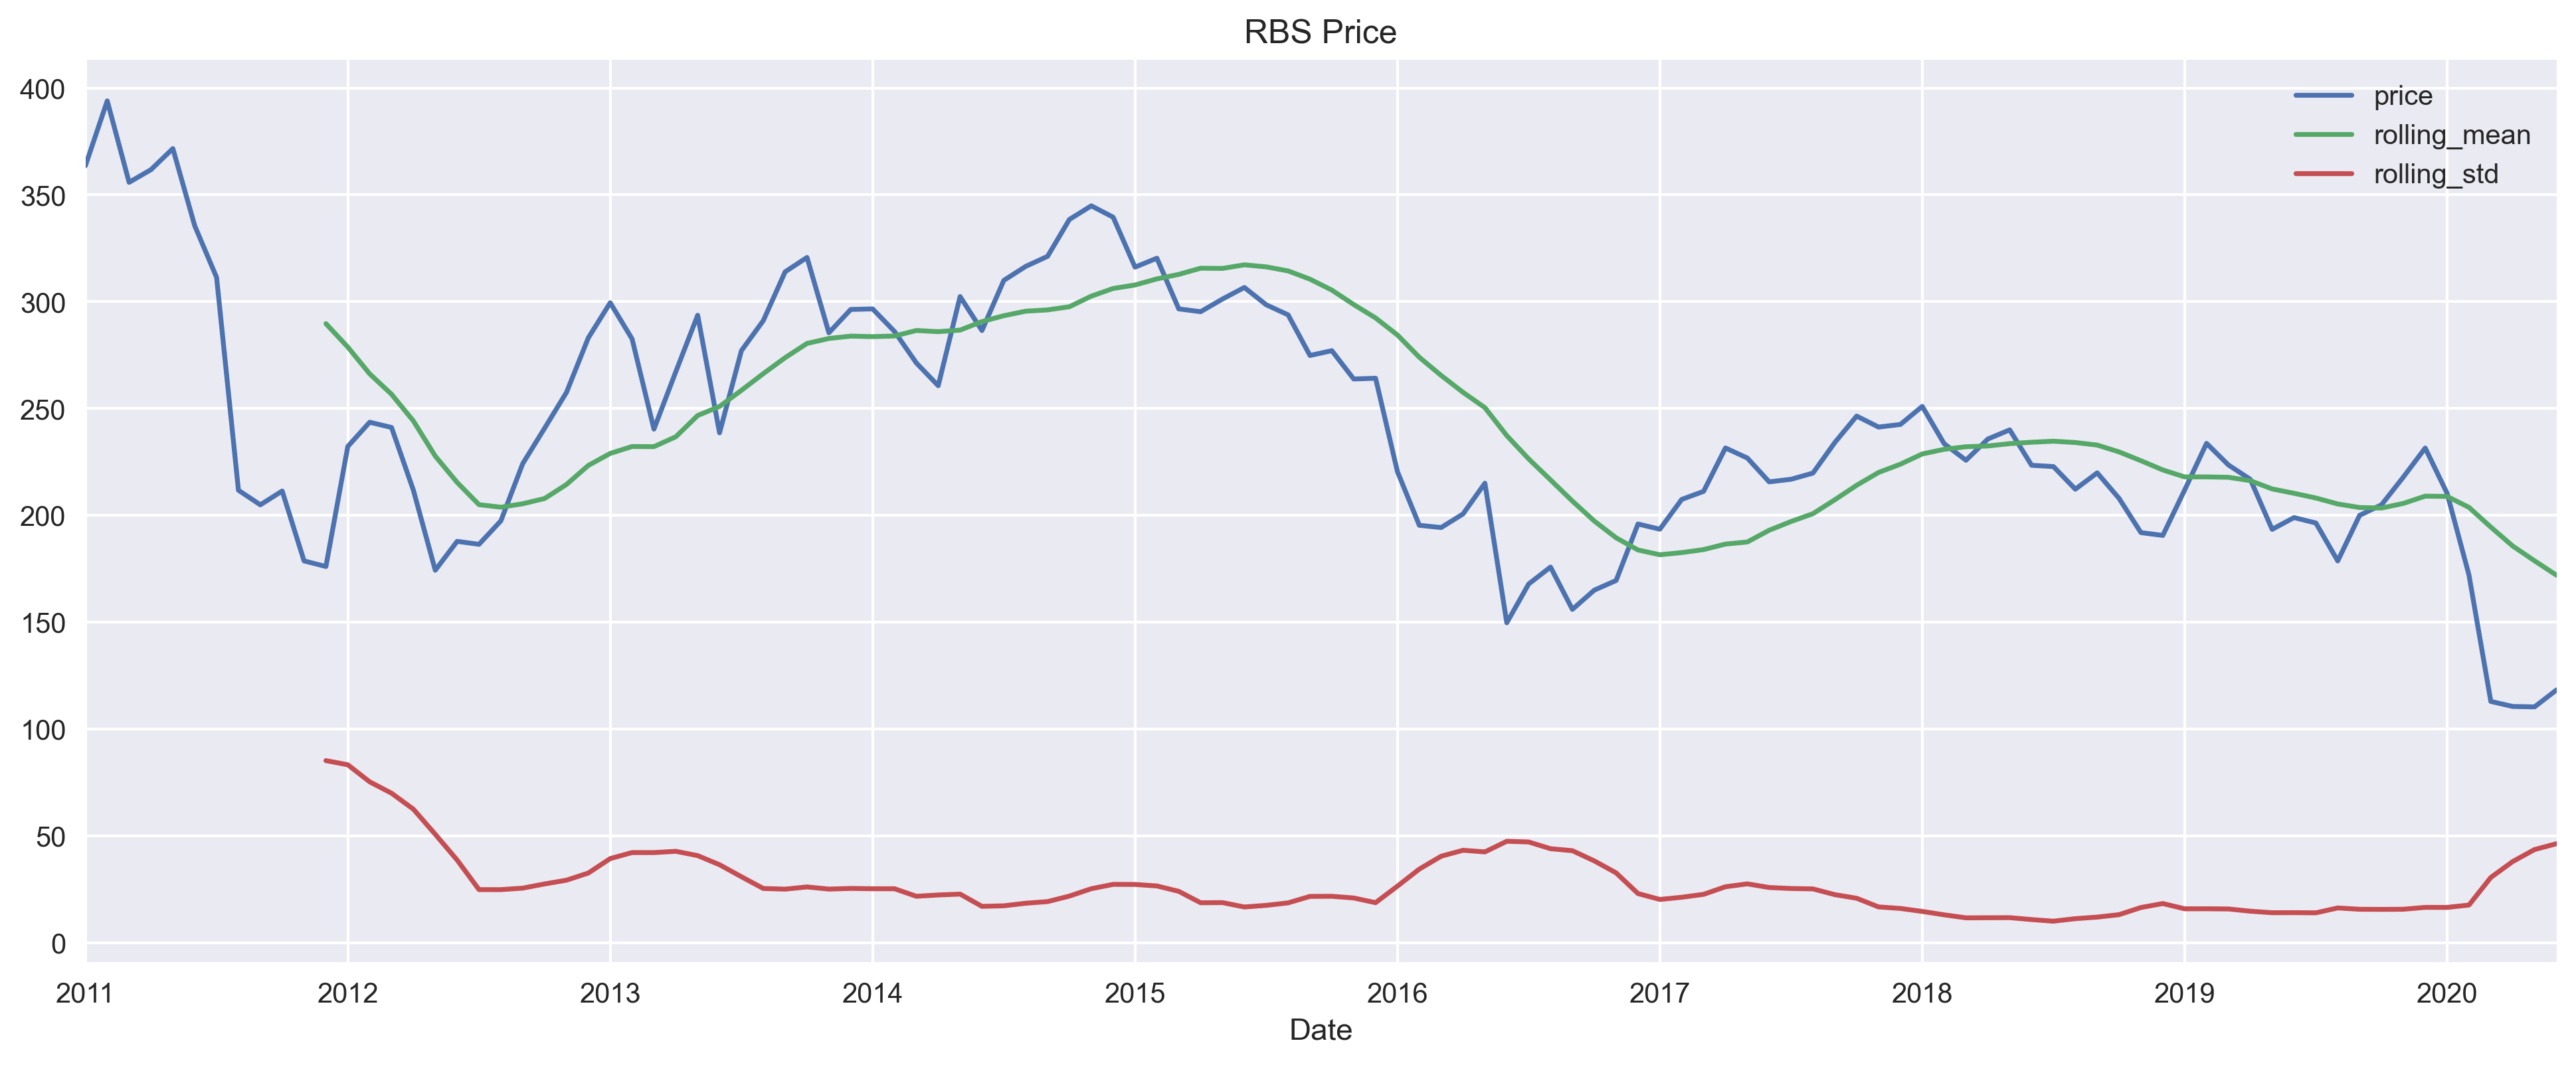

In [11]:
df.plot(title='RBS Price')

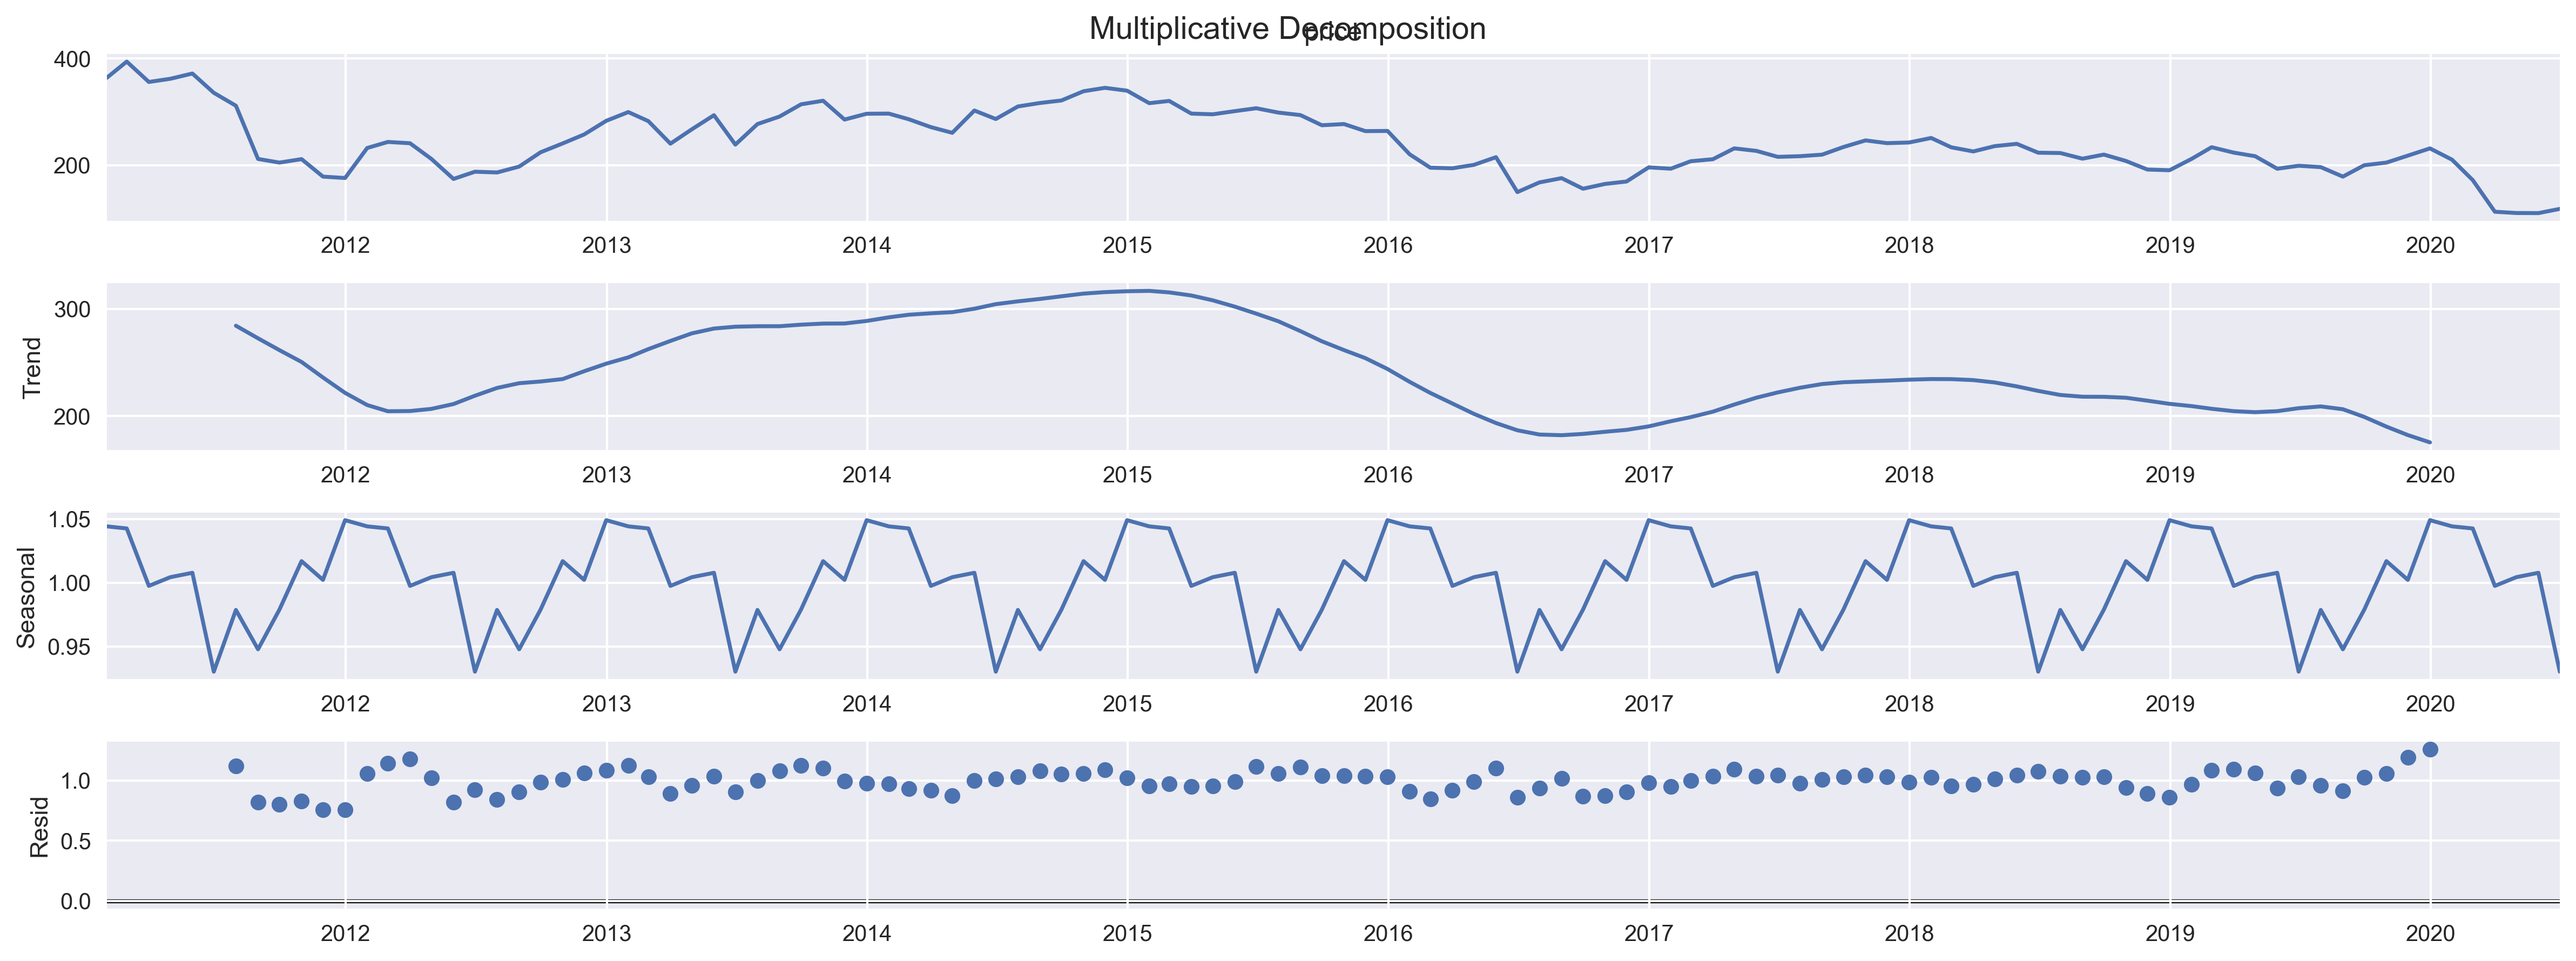

In [17]:
#seasonal Decomposition using multiplicative model
decomp_res = seasonal_decompose(df.price, model='multiplicative')
# plot the decomposition
decomp_res.plot().suptitle('Multiplicative Decomposition', fontsize=14)
plt.show()